# Wine Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wine=pd.read_csv('/content/drive/My Drive/ColabNotebooks/wine.csv')

## Wine dataset & its division into training and testing datasets (scaled):

In [ ]:
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine.shape

(178, 14)

In [ ]:
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
train, test=TTS(wine,test_size=0.25,random_state=4)

In [ ]:
print(f"Train size is: {train.shape}")
print(f"Few train data")
print()
train.head(5)

Train size is: (133, 14)
Few train data



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
101,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
141,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
148,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


In [ ]:
print(f"Test size is: {test.shape}")
print(f"Few test data")
print()
test.head(5)

Test size is: (45, 14)
Few test data



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
142,3,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
14,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
81,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714


In [ ]:
X_train = train.drop(['Class'],axis=1)

In [ ]:
X_train.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
5,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
101,12.6,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562


In [ ]:
Y_train = train['Class']
Y_train.head()

5      1
101    2
141    3
25     1
148    3
Name: Class, dtype: int64

In [ ]:
X_test = test.drop(['Class'],axis=1)

In [ ]:
X_test.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.4,0.94,5.28,0.68,1.75,675
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.5,0.55,4.35,0.89,2.06,520


In [ ]:
Y_test = test['Class']

In [ ]:
X_scaled = StandardScaler().fit_transform(X_train.values)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, index=X_train.index, columns=X_train.columns)

In [ ]:
X_scaled.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02
mean,2.400753e-15,1.101875e-16,1.130257e-15,2.771384e-16,-2.358180e-16,4.236377e-16,-2.670170e-16,-4.273941e-16,1.151961e-16,-3.339017e-18,-6.686381e-16,-1.001705e-16,-1.318912e-16
std,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00
min,-2.404430e+00,-1.256211e+00,-3.532455e+00,-2.654497e+00,-2.083407e+00,-2.155149e+00,-1.777509e+00,-1.803919e+00,-2.085055e+00,-1.595428e+00,-2.031404e+00,-1.896629e+00,-1.521528e+00
25%,-7.535553e-01,-6.340028e-01,-5.842564e-01,-7.212708e-01,-8.408371e-01,-8.411924e-01,-8.227737e-01,-7.947865e-01,-6.078380e-01,-7.738213e-01,-7.346092e-01,-9.247509e-01,-7.569232e-01
50%,8.420182e-02,-4.499693e-01,-2.269469e-02,-4.757084e-02,-1.505202e-01,1.202392e-01,1.218047e-01,-2.902204e-01,-6.267462e-02,-1.956534e-01,6.020046e-02,2.302346e-01,-2.625666e-01
75%,8.480392e-01,6.980488e-01,6.441598e-01,5.382552e-01,5.397966e-01,8.092651e-01,8.226210e-01,6.348175e-01,6.231761e-01,5.129283e-01,6.458497e-01,7.795570e-01,7.591038e-01
max,2.277154e+00,3.046666e+00,3.030797e+00,3.028016e+00,4.267508e+00,2.491770e+00,3.036794e+00,2.316705e+00,3.489680e+00,3.499405e+00,3.113943e+00,1.948628e+00,2.555266e+00


In [ ]:
train_scaled = MinMaxScaler().fit_transform(X_train.values)
X_train_scaled = pd.DataFrame(train_scaled, index=X_train.index, columns=X_train.columns)

In [ ]:
X_train_scaled.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.513593,0.291947,0.538217,0.467134,0.328048,0.463780,0.369214,0.437778,0.374019,0.313146,0.394804,0.493239,0.373217
std,0.214410,0.233281,0.152940,0.176644,0.158053,0.216010,0.208500,0.243599,0.180059,0.197019,0.195085,0.261044,0.246218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352632,0.144603,0.449198,0.340206,0.195652,0.282759,0.198312,0.244898,0.264984,0.161263,0.252033,0.252747,0.187551
50%,0.531579,0.187373,0.534759,0.458763,0.304348,0.489655,0.394515,0.367347,0.362776,0.274744,0.406504,0.553114,0.308812
75%,0.694737,0.454175,0.636364,0.561856,0.413043,0.637931,0.540084,0.591837,0.485804,0.413823,0.520325,0.695971,0.559418
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_scaled = MinMaxScaler().fit_transform(X_test.values)
X_test_scaled = pd.DataFrame(test_scaled, index=X_test.index, columns=X_test.columns) 

In [ ]:
X_test_scaled.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.552573,0.388229,0.650165,0.493671,0.259781,0.449244,0.398715,0.478407,0.426095,0.336181,0.511737,0.470707,0.344061
std,0.271673,0.247138,0.237183,0.192993,0.191041,0.292352,0.294628,0.259521,0.242006,0.243961,0.269586,0.307302,0.249221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312081,0.220903,0.514851,0.354430,0.126761,0.173709,0.104046,0.301887,0.248963,0.142708,0.281690,0.138528,0.147482
50%,0.543624,0.280285,0.663366,0.487342,0.225352,0.446009,0.445087,0.490566,0.410788,0.321875,0.549296,0.493506,0.291367
75%,0.778523,0.543943,0.841584,0.620253,0.323944,0.680751,0.656069,0.698113,0.589212,0.421875,0.704225,0.740260,0.535971
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Plots for analysis:

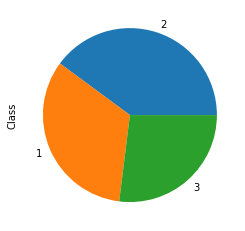

In [ ]:
wine.Class.value_counts().plot(kind='pie') #Class distribution in original dataset

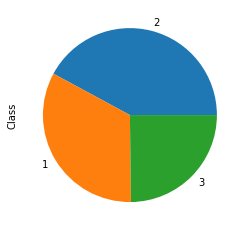

In [ ]:
Y_train.value_counts().plot(kind='pie') #Class distribution in training dataset

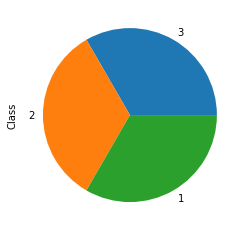

In [ ]:
Y_test.value_counts().plot(kind='pie') #Class distribution in testing dataset

### Calculation of influence of each attribute to class label, in ascending order and dropping least important attributes:

[0.11954599 0.04933463 0.02832209 0.04144624 0.03604424 0.06076364
 0.11827528 0.02550209 0.03576247 0.12121145 0.09395885 0.10476589
 0.16506715]


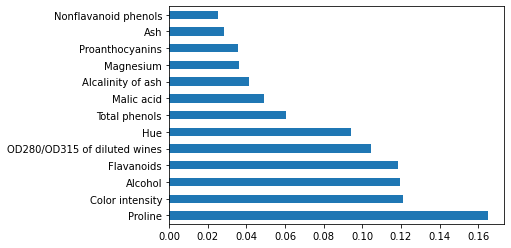

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_scaled, Y_train)

print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(13).plot(kind='barh')
#plt.savefig('comparision.png')
plt.show()

In [ ]:
contents_to_drop = ['Nonflavanoid phenols','Ash','Alcalinity of ash','Proanthocyanins','Malic acid']

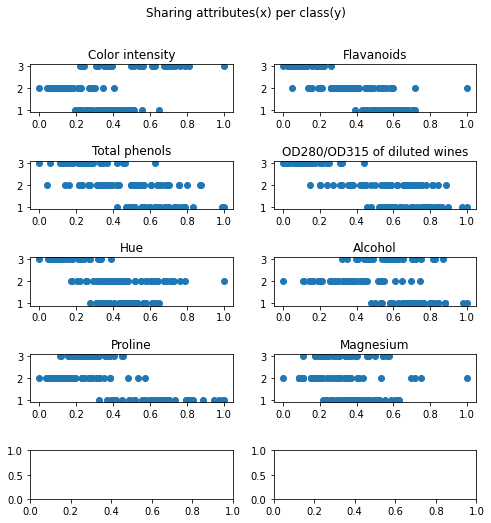

In [ ]:
att_fig, ax = plt.subplots(5, 2, figsize=(8,8))

att_fig.suptitle('Sharing attributes(x) per class(y)')
att_fig.subplots_adjust(hspace=1)

#keeping only important wine_contents.
wine_contents = set(X_train_scaled.columns) - set(contents_to_drop)
r = -1
for i, content in enumerate(wine_contents):
    if i%2 == 0: r += 1
    
    ax[r, i%2].scatter(X_train_scaled[content], Y_train)
    ax[r, i%2].set_title(content)

#plt.savefig('att_fig')

In [ ]:
X_train_scaled.columns.tolist()

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [ ]:
X_train_scaled = X_train_scaled.drop(contents_to_drop, axis=1)

In [ ]:
X_test_scaled = X_test_scaled.drop(contents_to_drop, axis=1)

In [ ]:
X_train_scaled.columns.tolist()

['Alcohol',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

## SVM Classifier :

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train_scaled, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn import metrics

In [ ]:
Y_pred = svm_clf.predict(X_test_scaled)

In [ ]:
print("Accuracy:{:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy:0.978


In [ ]:
print("Precision:{:.3f}".format(metrics.precision_score(Y_test, Y_pred,average='weighted')))

Precision:0.979


In [ ]:
print("Recall:{:.3f}".format(metrics.recall_score(Y_test, Y_pred,average='weighted')))

Recall:0.978


## Naive Bayes Classifier :

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_scaled, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = gnb_clf.predict(X_test_scaled) 

In [ ]:
print("Accuracy:{:.3f}".format(metrics.accuracy_score(Y_test, y_pred_nb)))

Accuracy:0.956


In [ ]:
print("Precision:{:.3f}".format(metrics.precision_score(Y_test, y_pred_nb,average='weighted')))

Precision:0.961


In [ ]:
print("Recall:{:.3f}".format(metrics.recall_score(Y_test, y_pred_nb,average='weighted')))

Recall:0.956


## Random Forest (Decision Tree) Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_r = RandomForestClassifier(max_depth=4, random_state=0)
clf_r.fit(X_train_scaled, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = clf_r.predict(X_test_scaled) 

In [ ]:
print("Accuracy:{:.3f}".format(metrics.accuracy_score(Y_test, y_pred_rf)))

Accuracy:0.978


In [ ]:
print("Precision:{:.3f}".format(metrics.precision_score(Y_test, y_pred_rf,average='weighted')))

Precision:0.979


In [ ]:
print("Recall:{:.3f}".format(metrics.recall_score(Y_test, y_pred_rf,average='weighted')))

Recall:0.978


In [ ]:
#   Optimal tree height calculation in Random Forest-
def find_optimum_height(max_depth, t_x, t_y, v_x, v_y):
    rf_model = RandomForestClassifier(max_depth=max_depth, random_state=8)
    rf_model.fit(t_x, t_y)
    predicted = rf_model.predict(v_x)
    
    score = {}
    score["accuracy"] = metrics.accuracy_score(v_y, predicted)
    score["precision"] = metrics.precision_score(v_y, predicted, average="weighted")
    score["recall"] = metrics.recall_score(v_y, predicted, average="weighted")
    return score

In [ ]:
depths = [2, 3, 4, 5, 6, 7]
score = {}

for d in depths:
    score[d] = find_optimum_height(d, X_train_scaled, Y_train, X_test_scaled, Y_test)
    print(f"At depth {d}: (accuracy, precision, recall) is {score[d]}")
    print()   

At depth 2: (accuracy, precision, recall) is {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

At depth 3: (accuracy, precision, recall) is {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

At depth 4: (accuracy, precision, recall) is {'accuracy': 0.9777777777777777, 'precision': 0.9791666666666666, 'recall': 0.9777777777777777}

At depth 5: (accuracy, precision, recall) is {'accuracy': 0.9777777777777777, 'precision': 0.9791666666666666, 'recall': 0.9777777777777777}

At depth 6: (accuracy, precision, recall) is {'accuracy': 0.9777777777777777, 'precision': 0.9791666666666666, 'recall': 0.9777777777777777}

At depth 7: (accuracy, precision, recall) is {'accuracy': 0.9777777777777777, 'precision': 0.9791666666666666, 'recall': 0.9777777777777777}

